# Important Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


encoded_airline_survey = pd.read_csv('encoded_airline_survey.csv')
encoded_airline_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                103904 non-null  int64
 1   Flight Distance                    103904 non-null  int64
 2   Inflight wifi service              103904 non-null  int64
 3   Departure/Arrival time convenient  103904 non-null  int64
 4   Ease of Online booking             103904 non-null  int64
 5   Gate location                      103904 non-null  int64
 6   Food and drink                     103904 non-null  int64
 7   Online boarding                    103904 non-null  int64
 8   Seat comfort                       103904 non-null  int64
 9   Inflight entertainment             103904 non-null  int64
 10  On-board service                   103904 non-null  int64
 11  Leg room service                   103904 non-null  int64
 12  Ba

# Seperating Features and Target Variables

In [3]:
# Separate features (X) and target (y)
X = encoded_airline_survey.drop(columns=["satisfaction_Encoded"])
y = encoded_airline_survey["satisfaction_Encoded"]

# Check the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (103904, 22)
Target shape: (103904,)


# Data Split

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Check the sizes of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (83123, 22)
Test features shape: (20781, 22)
Training target shape: (83123,)
Test target shape: (20781,)


# Machine Learning Algorithm

## Gradient Boosting

## Base Model

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the random forest classifier
gbm_untuned = GradientBoostingClassifier(random_state=2023)
gbm_untuned.fit(X_train, y_train)

# Predictions for train and test sets
y_train_pred = gbm_untuned.predict(X_train)
y_test_pred = gbm_untuned.predict(X_test)

# Train metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average="binary")
train_recall = recall_score(y_train, y_train_pred, average="binary")
train_f1 = f1_score(y_train, y_train_pred, average="binary")

# Test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average="binary")
test_recall = recall_score(y_test, y_test_pred, average="binary")
test_f1 = f1_score(y_test, y_test_pred, average="binary")

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_accuracy, train_precision, train_recall, train_f1],
    "Test": [test_accuracy, test_precision, test_recall, test_f1]
})

# Display the metrics DataFrame
print(metrics_df)


      Metric     Train      Test
0   Accuracy  0.932606  0.930080
1  Precision  0.945520  0.946832
2     Recall  0.895746  0.890026
3   F1 Score  0.919960  0.917551


## Confusion Matrix

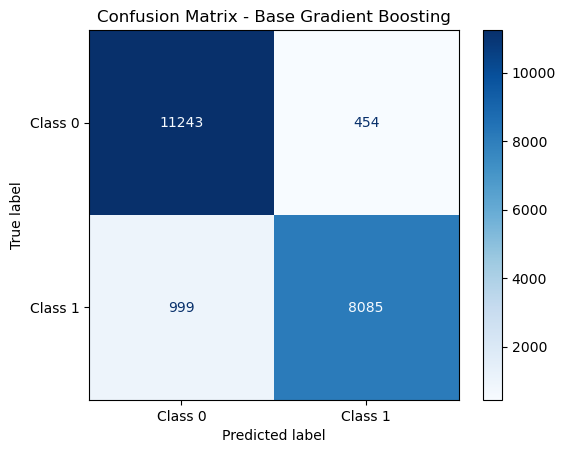

In [14]:
# Generate predictions for the test set
y_test_pred = gbm_untuned.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Base Gradient Boosting")
plt.show()


## Hyperparameter Tuning

## RandomizedSearchCV

In [16]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=2023, n_iter_no_change=10, validation_fraction=0.2)

# Define the parameter grid
params = {
    'n_estimators': np.arange(start=100, stop=500, step=100),  # Reduced range
    'learning_rate': [0.01, 0.1],  # Narrowed down values
    'max_features': ["sqrt"],  # Removed None for simplicity
    'subsample': [0.8, 0.9, 1.0],  # Retained subsample options
    'max_depth': np.arange(start=3, stop=10, step=3),  # Larger step size
    'min_samples_leaf': [2, 5]  # Reduced number of options
}

# Set up RandomizedSearchCV with parallel processing
grid = RandomizedSearchCV(
    gb,
    params,
    n_iter=50,  # Reduced number of iterations
    scoring="accuracy",
    n_jobs=-1,  # Use all CPU cores
    cv=5,  # 5-fold cross-validation
    random_state=2023
)

# Fit the grid search on training data
grid.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", grid.best_params_)


Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 9, 'learning_rate': 0.1}


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions for both train and test datasets
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

# Calculate metrics for training data
train_precision = precision_score(y_train, y_train_pred, average='binary')  # Adjust average for multiclass
train_recall = recall_score(y_train, y_train_pred, average='binary')
train_f1 = f1_score(y_train, y_train_pred, average='binary')

# Calculate metrics for testing data
test_precision = precision_score(y_test, y_test_pred, average='binary')  # Adjust average for multiclass
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

# Print the results
print("\nTraining Metrics:")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTesting Metrics:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")



Training Metrics:
Precision: 0.9881
Recall: 0.9584
F1 Score: 0.9730

Testing Metrics:
Precision: 0.9706
Recall: 0.9135
F1 Score: 0.9412


In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(start=150, stop=201, step=25),
    'learning_rate': [.001, .01, .1, .2],
    'max_features': ['sqrt'],
    'subsample': [.9],
    'max_depth': [9],
    'min_samples_leaf': [2, 5, 10, 20]    
}

grid = GridSearchCV(
    gb, 
    params,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 150,
 'subsample': 0.9}

In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Retrieve the best model
best_model = grid.best_estimator_

# Predictions for train and test datasets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary')  # Adjust 'binary' for multiclass
train_recall = recall_score(y_train, y_train_pred, average='binary')
train_f1 = f1_score(y_train, y_train_pred, average='binary')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')  # Adjust 'binary' for multiclass
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

# Create a DataFrame for formatted output
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_accuracy, train_precision, train_recall, train_f1],
    "Test": [test_accuracy, test_precision, test_recall, test_f1]
})

# Display the DataFrame
print(metrics)


      Metric     Train      Test
0   Accuracy  0.973690  0.950387
1  Precision  0.986481  0.971211
2     Recall  0.952199  0.913584
3   F1 Score  0.969037  0.941517


## Confusion Matrix

Confusion Matrix (Testing):
[[11451   246]
 [  785  8299]]


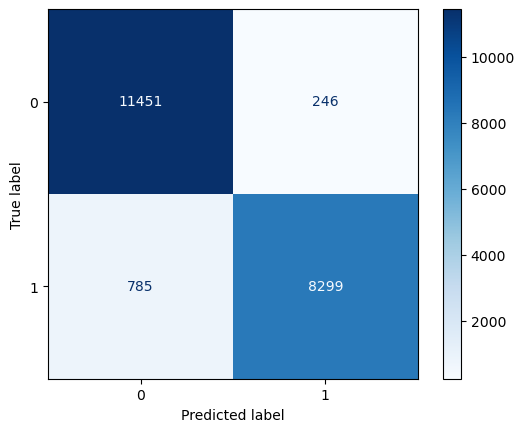

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the test dataset
y_test_pred = best_model.predict(X_test)

# Compute confusion matrix for the test dataset
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix (Testing):")
print(conf_matrix_test)
ConfusionMatrixDisplay(conf_matrix_test).plot(cmap='Blues')


## Feature Importance

Feature Importances:
                              Feature  Importance
7                     Online boarding    0.222121
2               Inflight wifi service    0.148113
20                          Class_Eco    0.132228
19     Type of Travel_Personal Travel    0.089609
9              Inflight entertainment    0.036835
8                        Seat comfort    0.036535
18    Customer Type_disloyal Customer    0.035415
11                   Leg room service    0.035150
14                   Inflight service    0.031948
13                    Checkin service    0.029490
4              Ease of Online booking    0.027464
12                   Baggage handling    0.024455
0                                 Age    0.023683
10                   On-board service    0.023589
15                        Cleanliness    0.022632
1                     Flight Distance    0.020968
3   Departure/Arrival time convenient    0.016959
21                     Class_Eco Plus    0.013751
5                       Gate 

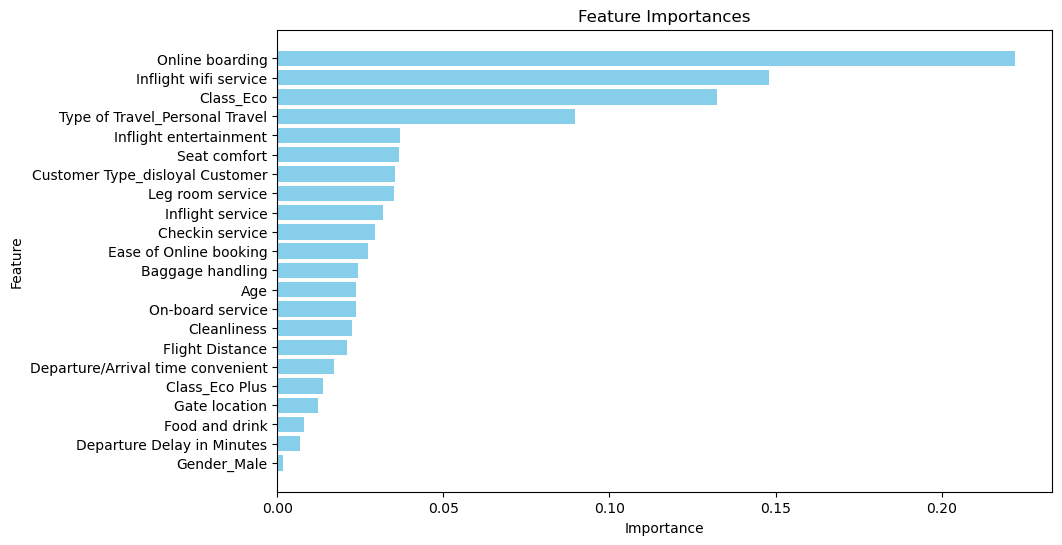

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame to pair features with their importance
feature_names = X_train.columns  # Adjust this if your dataset has no column names
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Print the feature importance table
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()


## ROC Curve

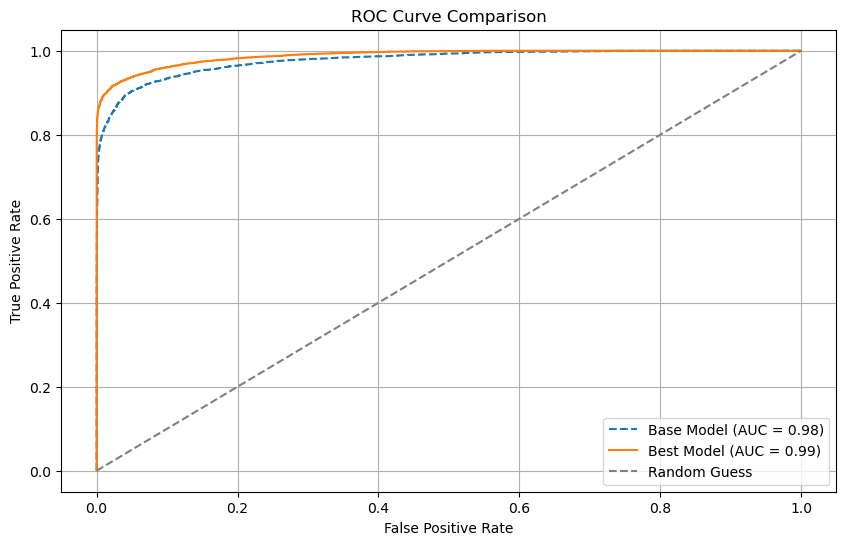

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the base model (e.g., GradientBoostingClassifier with default parameters)
base_model = GradientBoostingClassifier(random_state=2023)
base_model.fit(X_train, y_train)

# Get the probabilities for the base model and best model
base_model_probs = base_model.predict_proba(X_test)[:, 1]
best_model_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for the base model
base_fpr, base_tpr, _ = roc_curve(y_test, base_model_probs)
base_auc = auc(base_fpr, base_tpr)

# Calculate ROC curve and AUC for the best model
best_fpr, best_tpr, _ = roc_curve(y_test, best_model_probs)
best_auc = auc(best_fpr, best_tpr)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(base_fpr, base_tpr, label=f"Base Model (AUC = {base_auc:.2f})", linestyle="--")
plt.plot(best_fpr, best_tpr, label=f"Best Model (AUC = {best_auc:.2f})", linestyle="-")
plt.plot([0, 1], [0, 1], color='gray', linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
## 